In [1]:
from robustness_optimization.name_tbd_initialization import read_settings
from robustness_optimization.types.optimization_types import Optimization
from robustness_optimization.interface import SimpyModel
from robustness_optimization.types.sampling_model import SamplingModel

import matplotlib.pyplot as plt

In [2]:
#read settings.json
settings = read_settings()
#create GAN
factor_sampling_model = SamplingModel(**settings.factor_gan_parameter(), model_flag= 'vanilla-gan')
noise_sampling_model = SamplingModel(**settings.noise_gan_parameter(), model_flag= 'vanilla-gan')
#set simulation model type and path
simulation_model = SimpyModel("C:/Users/fconrad/git/robustness-optimization-gan/simpy_case_study/model.py")
#initialize optimization
optimization = Optimization(
    settings= settings,
    simulation_model= simulation_model,
    factor_sampling_model= factor_sampling_model,
    noise_sampling_model= noise_sampling_model,
)


INITIAL GAN TRAINING...
Epoch 1/3
32/32 [==============================] - 0s 1ms/step - d_loss: 1.3855 - g_loss: 0.7142
Epoch 2/3
32/32 [==============================] - 0s 1ms/step - d_loss: 1.4097 - g_loss: 0.6670
Epoch 3/3
32/32 [==============================] - 0s 2ms/step - d_loss: 1.3876 - g_loss: 0.6782
INITIAL GAN TRAINING...
Epoch 1/3
32/32 [==============================] - 0s 2ms/step - d_loss: 1.4194 - g_loss: 0.6329
Epoch 2/3
32/32 [==============================] - 0s 2ms/step - d_loss: 1.3762 - g_loss: 0.6650
Epoch 3/3
32/32 [==============================] - 0s 2ms/step - d_loss: 1.2640 - g_loss: 0.7599


In [3]:
history = optimization.run()

find best candidate from initial factor design...

evaluate factor design:

________________________________________
|{'num_machines': 3, 'buffer_size': 4, 'num_testing_station': 1}|
|{'num_machines': 2, 'buffer_size': 4, 'num_testing_station': 3}|
|{'num_machines': 6, 'buffer_size': 1, 'num_testing_station': 1}|
|{'num_machines': 6, 'buffer_size': 5, 'num_testing_station': 2}|
|{'num_machines': 5, 'buffer_size': 3, 'num_testing_station': 1}|
|{'num_machines': 2, 'buffer_size': 1, 'num_testing_station': 2}|
|{'num_machines': 3, 'buffer_size': 2, 'num_testing_station': 2}|
|{'num_machines': 1, 'buffer_size': 3, 'num_testing_station': 2}|
|{'num_machines': 5, 'buffer_size': 2, 'num_testing_station': 2}|
|{'num_machines': 1, 'buffer_size': 5, 'num_testing_station': 2}|
________________________________________
with noise design:

________________________________________
|{'product_mix': [0.8036936014855482, 0.15214641024785713, 0.04415998826659461]}|
|{'product_mix': [0.21068758315032327, 

Beim Starten von der Kommandozeile -> Ergebnisse in /output !

best factor config:
{'num_machines': 6, 'buffer_size': 5, 'num_testing_station': 2, 'response': [591.6, 519.6, 712.4, 641.2, 622.8, 717.0, 677.8], 'sn_ratio': 128.899}
worst noise design:
[{'product_mix': [0.12960748374462128, 0.3950965404510498, 0.4752959609031677], 'response': 600.2}, {'product_mix': [0.12120115756988525, 0.152913436293602, 0.7258853912353516], 'response': 523.2}, {'product_mix': [0.47680023312568665, 0.2882726788520813, 0.23492708802223206], 'response': 711.2}, {'product_mix': [0.1796463578939438, 0.4470393657684326, 0.3733142614364624], 'response': 640.2}, {'product_mix': [0.243962362408638, 0.28489336371421814, 0.47114425897598267], 'response': 614.8}, {'product_mix': [0.2279738187789917, 0.6782900094985962, 0.09373612701892853], 'response': 713.8}, {'product_mix': [0.25355514883995056, 0.4099428355693817, 0.3365020155906677], 'response': 669.8}]


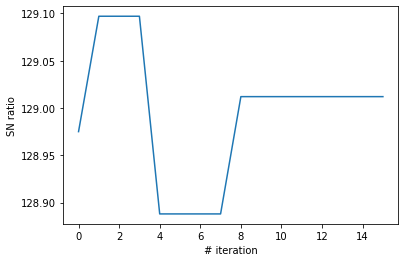

In [5]:
# results:
print("best factor config:")
print(history['best_factor_config'])
print('worst noise design:')
print(history['worst_noise_design'].state)

plt.ylabel("SN ratio")
plt.xlabel("# iteration")
plt.plot(history['sn_history'])